# Fig. 9(b): Dependence of Frequency Change $\Delta f$ on Particle Size

This notebook reproduces Fig. 9(b) in the paper, which shows how the frequency change $\Delta f$ of the first five eigenmodes depends on the particle size, with the separation between the bottom of the particle and the disc surface held constant at d = 30 nm.

In [1]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
from style_helpers import style_cycle

%matplotlib inline
plt.style.use('style_sheets/custom_style.mplstyle')

Read the data frame containing the eigenmode data and filter out the parameter values relevant for this plot.

In [2]:
df = pd.read_csv('../data/eigenmode_info_data_frame.csv')
df = df.query('(has_particle == True) and (x == 0) and (y == 0) and '
              '(d == 30) and (Hz == 8e4) and (Ms_particle == 1e6)')
df = df.sort_values('d_particle')

Define helper function to plot $\Delta f$ vs. particle size for a single eigenmode.

In [3]:
def plot_curve_for_eigenmode(ax, N, df, style_kwargs):
    df_filtered = df.query('N == {}'.format(N)).sort_values('d_particle')
    d_vals = df_filtered['d_particle']
    freq_vals = df_filtered['freq_diff'] * 1e3  # freq in MHz
    ax.plot(d_vals, freq_vals, label='N = {}'.format(N), **style_kwargs)

Produce the plot for Fig. 9(b).

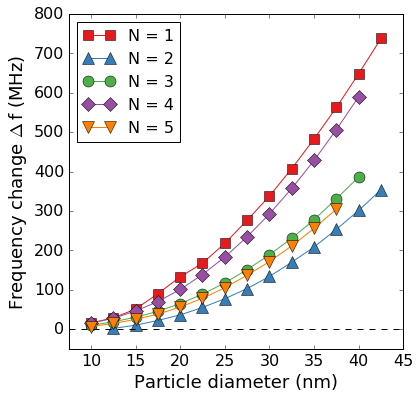

In [4]:
fig, ax = plt.subplots(figsize=(6, 6))

for N, style_kwargs in zip([1, 2, 3, 4, 5], style_cycle):
    plot_curve_for_eigenmode(ax, N, df, style_kwargs)

xmin, xmax = 7.5, 45
ymin, ymax = -50, 800

ax.plot([xmin, xmax], [0, 0], color='black', linestyle='--', linewidth=1)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Particle diameter (nm)')
ax.set_ylabel(r'Frequency change $\Delta\,$f (MHz)')
ax.legend(loc='upper left')